# Proyek Analisis Data: Nama dataset
- Nama:Gilbert O.K.D Malau
- Email:gilbertmalau476@gmail.com
- Id Dicoding:gilbert2036

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
Bagaimana pengaruh Working Day dalam jumlah penggunaan bike sharing?
- pertanyaan 2
Bagaimana pengaruh cuaca terhadap jumlah penggunaan bike-sharing?
-pertanyaan 3
bagaimana tren penggunaan bike sharing berdasarkan jam?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Membuka data_bike_day

In [3]:
data_bike_day = pd.read_csv('drive/MyDrive/Dicoding/Proyek_Anlisa_Data/day.csv')
data_bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuka data_bike_hour

In [4]:
data_bike_hour = pd.read_csv('drive/MyDrive/Dicoding/Proyek_Anlisa_Data/hour.csv')
data_bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Cek data pada data_bike_df

In [5]:
data_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tipe data 'dteday' seharusnya datetime

In [6]:
data_bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat data yang missing value

In [7]:
print("Jumlah data duplikat = ",data_bike_day.duplicated().sum())

Jumlah data duplikat =  0


Tidak terdapat data yang duplikat

Cek nilai pada data_bike_hour

In [8]:
data_bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


'dteday' seharusnya memiliki tipe data datetime

In [9]:
data_bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value

In [10]:
print("Jumlah data duplikat = ",data_bike_hour.duplicated().sum())

Jumlah data duplikat =  0


Tidak terdapat data yang duplikat

### Cleaning Data

Melakukan cleaning data terhadap tipe data yang belum sesuai.Mengubah tipe data object menjadi datetime

In [11]:
data_bike_day['dteday'] = pd.to_datetime(data_bike_day['dteday'])
data_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data pada tabel 'dtetime' telah berubah menjadi tipe data datetime

In [12]:
data_bike_hour['dteday'] = pd.to_datetime(data_bike_hour['dteday'])
data_bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

tipe data pada tabel 'dteday' telah berubah menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahapan EDA, saya menggunakan data_bike_hour dikarenaka data yang berbeda hanya terletak pada tabel 'hr' dan selebihnya sama.

In [35]:
data_bike_hour.describe()

,instant,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahapan ini,mengembalikan semua nilai ke bentuk sebenarnya agar visualisasi yang dihasilkan lebih mudah dipahami

In [14]:
season = {1:'Springer',
          2:'Summer',
          3:'Fall',
          4:'Winter'
}
data_bike_hour['season'] = data_bike_hour['season'].map(season)


In [15]:
data_bike_hour.groupby(by='season').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Springer,60622,410726,471348


Mengembalikan nilai pada kolom 'yr' ke nilai sebenarnya agar visualisasi mudah dimengerti

In [16]:
year = {
    0 : '2011',
    1 : '2012'
}
data_bike_day['yr'] = data_bike_day['yr'].map(year)

In [17]:
data_bike_hour.groupby(by='yr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending = False)

,casual,registered,cnt
yr,,,
1,372765,1676811,2049576
0,247252,995851,1243103


Pad tahapan ini nilai pada 'casual' dan 'registered' di jumlahkan dan diurutkan

In [18]:
data_bike_hour.groupby(by='mnth').agg({'casual':'sum',
    'registered':'sum',
    'cnt':'sum'}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


Pada tahap ini nilai pada kolom 'weekday' dikembalikan ke nilai sebenarnya untuk mempermudah memahami visualisasi

In [19]:
days ={
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesdey',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}
data_bike_hour['weekday'] = data_bike_hour['weekday'].map(days)

In [20]:
data_bike_hour.groupby(by='weekday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesdey,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


Pada tahap ini kolom 'workingday' mengubah nilai 0 menjadi "Holiday" dan 1 menjadi "working day"

In [21]:
holiday = {
    0 : "Holiday",
    1 : "Working Day"
}
data_bike_hour['workingday'] = data_bike_hour['workingday'].map(holiday)

In [22]:
data_bike_hour.groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
workingday,,,
Working Day,303285,1989125,2292410
Holiday,316732,683537,1000269


Pada tahap in mengembalikan nilai seebenarnya untuk mempermudah visualisasi

In [23]:
holiday = {
    0 : 'Not Holiday',
    1 : 'Holiday'
}
data_bike_hour['holiday'] = data_bike_hour['holiday'].map(holiday)

In [24]:
data_bike_hour.groupby(by='holiday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
holiday,,,
Not Holiday,597658,2616586,3214244
Holiday,22359,56076,78435


Merubah nilai pada kolom weathersit  pada nilai sebenarnya untuk mempermudah visualisasi
dan melakukan pengelompokan kebeberap kelompok seperti
-clear weather : Clear, Few clouds, Partly cloudy, Partly cloudy
-Misty weather: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-Light Weather: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-Extreme Weather: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [25]:
wheaters = {
    1 : 'Clear Weather',
    2 : 'Misty Weather',
    3 : 'Light Weather',
    4 : 'Extreme Weather'
}
data_bike_hour['weathersit'] = data_bike_hour['weathersit'].map(wheaters)

In [26]:
data_bike_hour.groupby(by='weathersit').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weathersit,,,
Clear Weather,462745,1875428,2338173
Misty Weather,134481,661471,795952
Light Weather,22783,135548,158331
Extreme Weather,8,215,223


Pada kode diatas mengelompokkan menjadi beberpa kelompok cuaca

Explorasi Data hanya pada table Hour\'hr',diakrenakan tabel lainnya memiliki strukutur sama pada data_bike_day

In [27]:
data_bike_hour.groupby(by='hr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pengaruh Working Day dalam jumlah penggunaan bike sharing?

In [52]:
workingdays = data_bike_hour.groupby(by= 'workingday').agg(total = ('cnt', 'sum'),
count = ('instant','nunique')
).sort_values(by='total', ascending = False).reset_index()
workingdays

,workingday,total,count
0,Working Day,2292410,11865
1,Holiday,1000269,5514


Menjumlahkan data untuk mendapatkan total pada kolom workingday

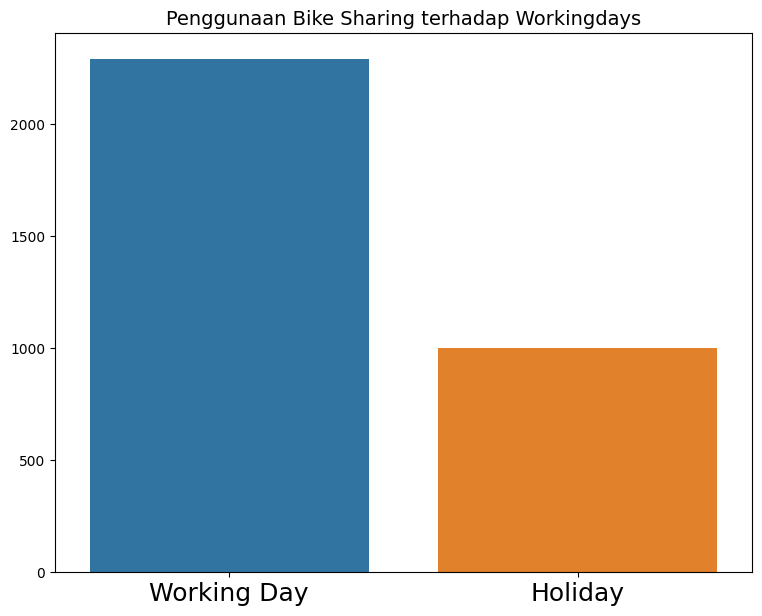

In [53]:
workingdays['total'] = workingdays['total']/1000

plt.figure(figsize=(9, 7))

sns.barplot(
    x='workingday',
    y=('total'),
    data= workingdays
)
plt.title("Penggunaan Bike Sharing terhadap Workingdays", loc='center', fontsize= 14)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=18)
plt.show()

### Pertanyaan 2:Bagaimana pengaruh cuaca terhadap jumlah penggunaan bike-sharing?

In [54]:
weathers = data_bike_hour.groupby(by= 'weathersit').agg(
    total = ('cnt', 'sum'),
    count = ('instant','nunique')
).sort_values(by='count', ascending = False).reset_index()
weathers

,weathersit,total,count
0,Clear Weather,2338173,11413
1,Misty Weather,795952,4544
2,Light Weather,158331,1419
3,Extreme Weather,223,3


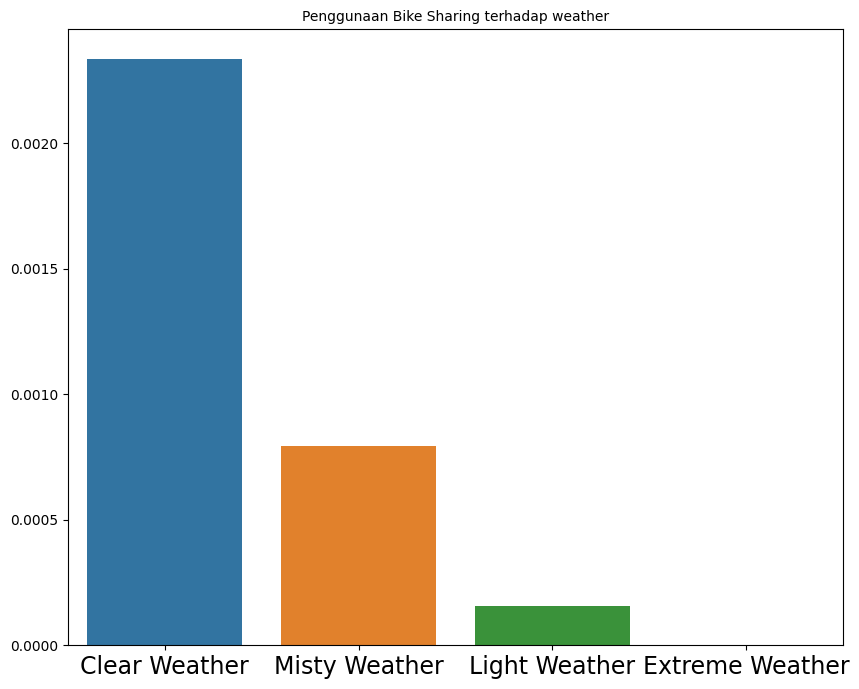

In [50]:
weathers['total'] = weathers['total'] / 1000

plt.figure(figsize=(10, 8))

sns.barplot(
    x='weathersit',
    y='total',
    data= weathers
)
plt.title("Penggunaan Bike Sharing terhadap weather", loc='center', fontsize= 10)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=17)
plt.show()

karena data yang saya gunakan data_bike_hour menyebabkan adanya penambahan label seperti Extreme weather yang mana memiliki nilai yang sangat kecil pada barchart tersebut



### Pertanyaan 3:bagaimana tren penggunaan bike sharing berdasarkan jam?



In [32]:
hours = data_bike_hour.groupby(by='hr').agg(
    total = ('cnt', 'sum'),
    count = ('instant', 'nunique')
).sort_values(by='total', ascending=False).reset_index()
hours

,hr,total,count
0,17,336860,730
1,18,309772,728
2,8,261001,727
3,16,227748,730
4,19,226789,728
5,13,184919,729
6,12,184414,728
7,15,183149,729
8,14,175652,729
9,20,164550,728


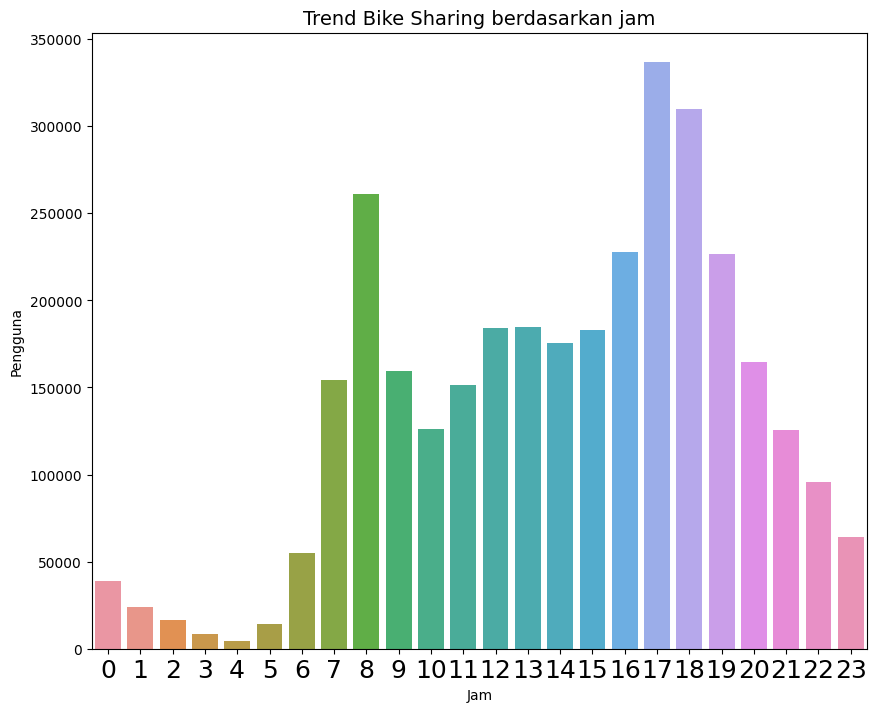

In [33]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='hr',
    y='total',
    data= hours
)
plt.title("Trend Bike Sharing berdasarkan jam", loc='center', fontsize= 14)
plt.xlabel('Jam')
plt.ylabel('Pengguna')
plt.tick_params(axis='x', labelsize=18)
plt.show()

## Conclusion

- Conclution pertanyaan 1
Berdasarkan Visualisasi yang di tampilkan, bahwa penggunaa Bike Sharing selama working days lebih tinggi dibanding holidays
- conclution pertanyaan 2
Berdasarkan visualisasi yang ditampilkan bahwa pengguna Bike sharing terhadap kondisi cuaca paling tinggi pada cuaca yang terang/clearweather.namun karena data yang saya gunakan data_bike_hour menyebabkan adanya penambahan label seperti Extreme weather yang mana memiliki nilai yang sangat kecil pada barchart tersebut
-conclution pertanyaan 3
Berdasarkan visualisasi yang ditampilkan bahwa pengguna bike sharing terbanyaj=k pada jam 17

In [36]:
data_bike_hour.to_csv("all_data.csv", index=False)